<a href="https://colab.research.google.com/github/MrAgui/LE1_Aguilar_KJ/blob/main/LE1_Aguilar_KJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Source**:
> Tfekci,Pnar and Kaya,Heysem. (2014). Combined Cycle Power Plant. UCI Machine Learning Repository. https://doi.org/10.24432/C5002N.

**Data**:
The "Combined Cycle Power Plant" dataset contains the following features (variables):

*   Temperature (T): The temperature measured in °C.
*   Ambient Pressure (AP): The ambient pressure is measured in millibars
*   Relative Humidity (RH): The relative humidity measured in percent.
*   Exhaust Vacuum (V): The exhaust vacuum measured in cm Hg.
*Electrical Energy Output (PE): The electrical energy output of the power plant measured in MW.



# Connecting GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Get Dataset in Gdrive

In [42]:
# Create Data Frame
df = pd.read_csv('/content/drive/MyDrive/datasets/Folds5x2_pp.csv')

# Dataset Analysis

In [43]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [44]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# Data Cleaning Process

In [ ]:
duplicates = df.duplicated().sum()
print("Total duplicates:", duplicates)

Total duplicates: 41


`After duplicates, check if there are missing values.`

In [ ]:
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)


Missing data:
 AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


`Once confirmed that there are no missing values, proceed to data cleaning by droping the duplicates.`

In [51]:
df = df.drop_duplicates()

# Define X and Y
Dependent varialbles:
AT	V	AP	RH  
Independent variables:
PE

In [46]:
x = df.drop("PE", axis=1)
y = df["PE"]

In [47]:
print("X values are: \n", x)

X values are: 
          AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [48]:
print("Y values are: \n", y)

Y values are: 
 0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


# Define Second X and Y

In [49]:
x1 = df.drop(["AP", "RH", "PE"], axis=1)
y1 = df["PE"]
print("X values are: \n", x1)
print("Y values are: \n", y1)

X values are: 
          AT      V
0     14.96  41.76
1     25.18  62.96
2      5.11  39.40
3     20.86  57.32
4     10.82  37.50
...     ...    ...
9563  16.65  49.69
9564  13.19  39.18
9565  31.32  74.33
9566  24.48  69.45
9567  21.60  62.52

[9568 rows x 2 columns]
Y values are: 
 0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


In [52]:
duplicates = df.duplicated().sum()
print("Total duplicates:", duplicates)

Total duplicates: 0


# Define Third X and Y

In [ ]:
x2 = df.drop(["AT", "V", "PE"], axis=1)
y2 = df["PE"]

# Plotting Dataset

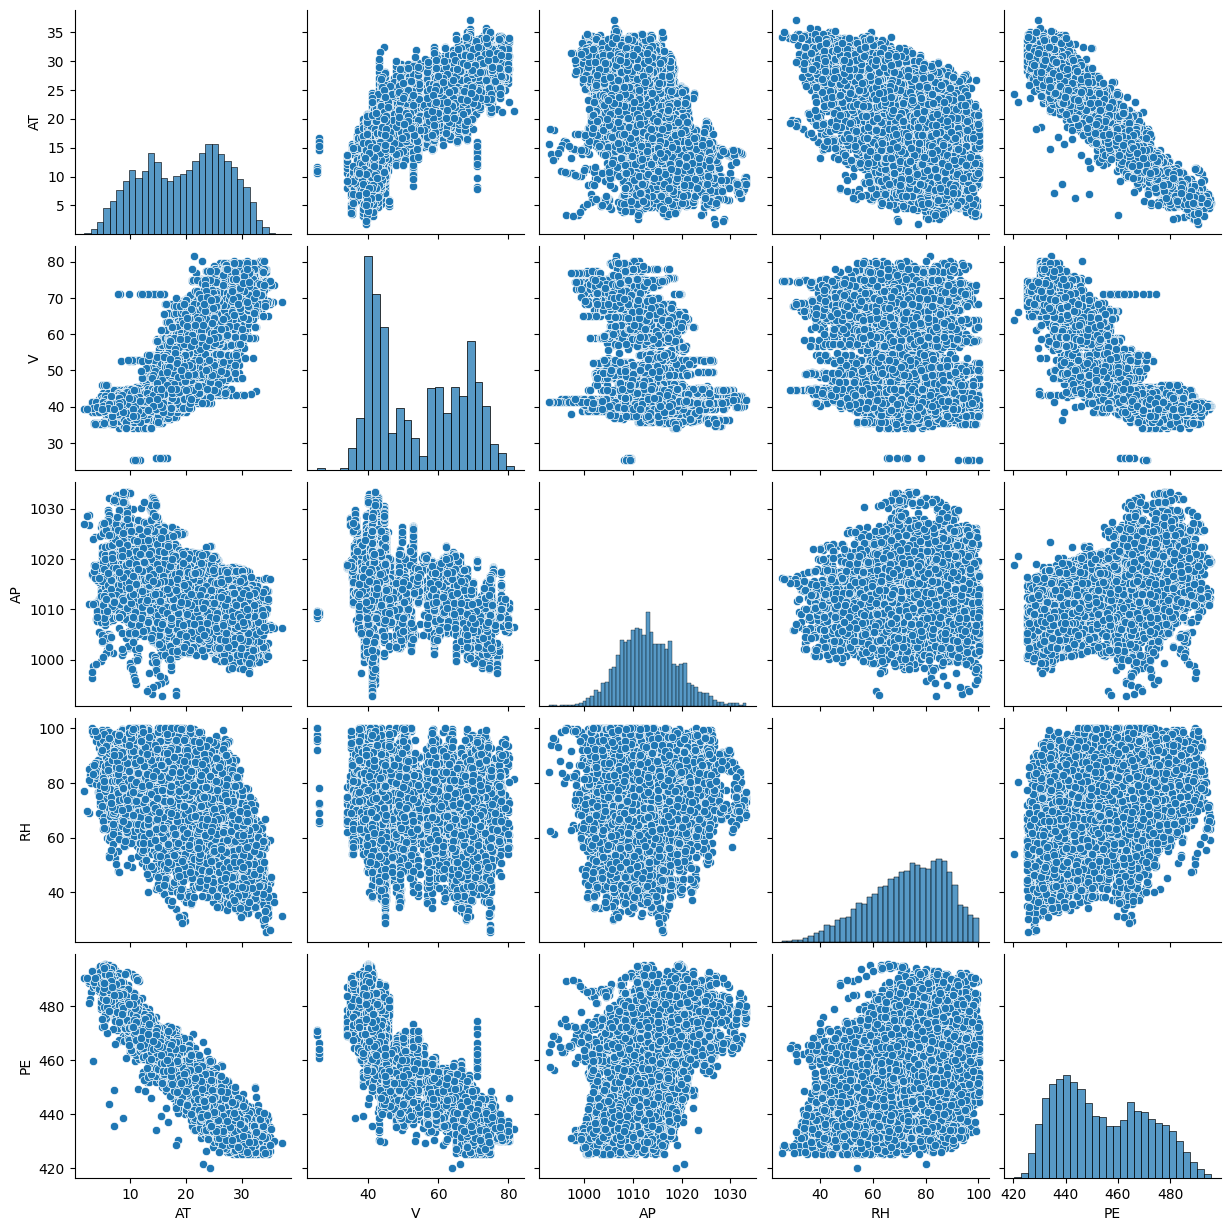

In [ ]:
sns.pairplot(df)

# Splitting Dataset

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [53]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [60]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=0)

# Model

In [54]:
model = LinearRegression()

# RESULTS

In [69]:
def evaluate_model(model, x_train, y_train, x_test, y_test, feature_set_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = model.score(x_test, y_test) * 100

    print("RESULTS FROM {} FEATURES\n".format(feature_set_name))
    print("Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Root Mean Absolute Error: {:.2f}".format(rmse))
    print("R-squared (R^2) Score: {:.2f}".format(r2))
    print("Mean Absolute Error: {:.2f}".format(mae))
    print("Accuracy: {:.2f}%\n".format(accuracy))

In [71]:
evaluate_model(model, x_train, y_train, x_test, y_test, "FIRST")


RESULTS FROM FIRST FEATURES

Mean Squared Error (MSE): 20.37
Root Mean Absolute Error: 4.51
R-squared (R^2) Score: 0.93
Mean Absolute Error: 3.60
Accuracy: 93.04%



In [72]:
evaluate_model(model, x1_train, y1_train, x1_test, y1_test, "SECOND")

RESULTS FROM SECOND FEATURES

Mean Squared Error (MSE): 24.16
Root Mean Absolute Error: 4.92
R-squared (R^2) Score: 0.92
Mean Absolute Error: 3.90
Accuracy: 91.75%



In [73]:
evaluate_model(model, x2_train, y2_train, x2_test, y2_test, "THIRD")

RESULTS FROM THIRD FEATURES

Mean Squared Error (MSE): 172.98
Root Mean Absolute Error: 13.15
R-squared (R^2) Score: 0.40
Mean Absolute Error: 10.74
Accuracy: 39.99%



In [90]:
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted')
    plt.plot(y_test, y_test, color='blue', label='Actual')
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.legend()
    plt.show()


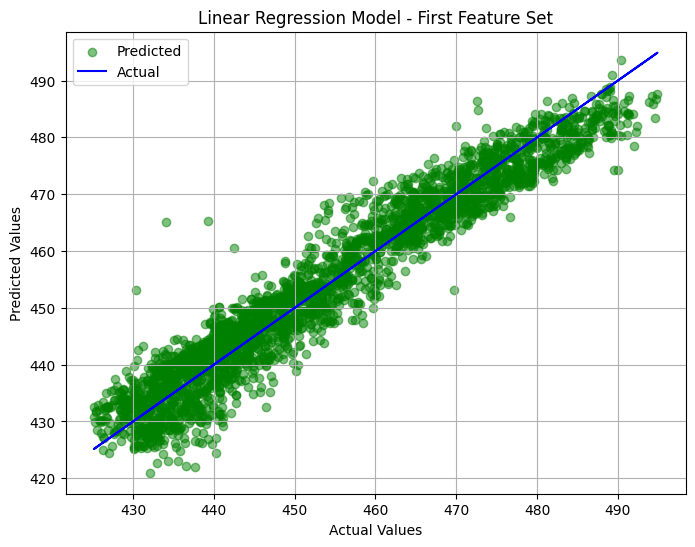

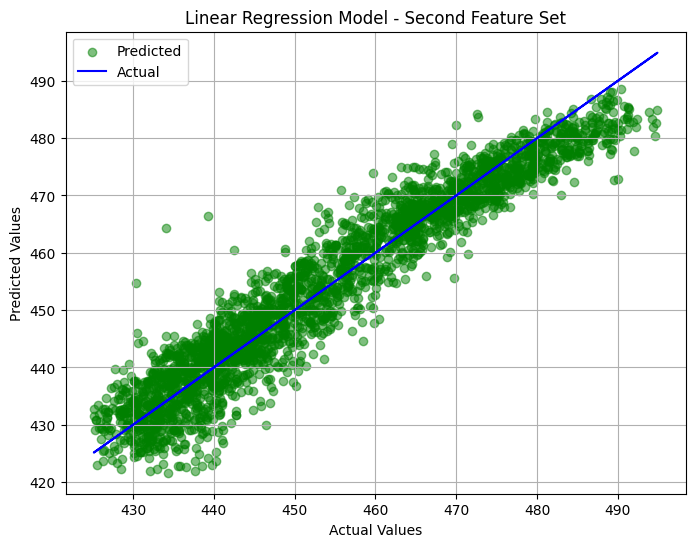

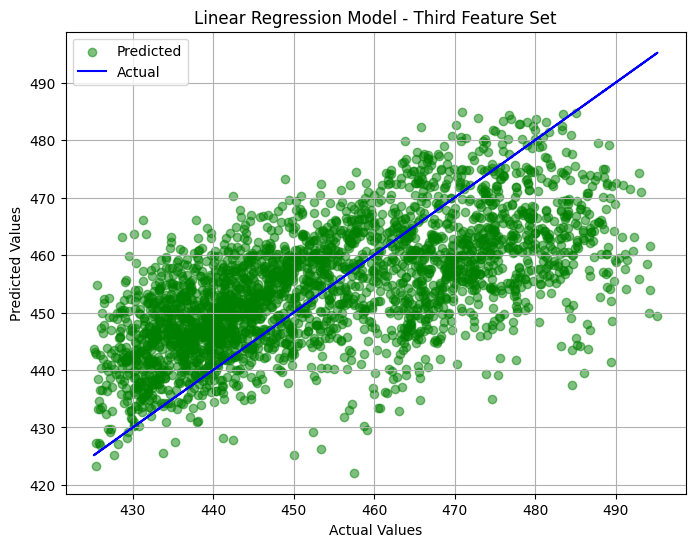

In [92]:
plot_actual_vs_predicted(y_test, y_pred, 'Linear Regression Model - First Feature Set')
plot_actual_vs_predicted(y1_test, y1_pred, 'Linear Regression Model - Second Feature Set')
plot_actual_vs_predicted(y2_test, y2_pred, 'Linear Regression Model - Third Feature Set')

# PREDICTED VALUES

In [102]:
df_predY=pd.DataFrame({'Actual Value': y_test, 'Predicted value':y_pred, 'Difference':y_test-y_pred})
df_predY.head()

,Actual Value,Predicted value,Difference
4834,431.23,431.402451,-0.172451
1768,460.01,458.614741,1.395259
2819,461.14,462.819674,-1.679674
7779,445.90,448.601237,-2.701237
7065,451.29,457.879479,-6.589479


In [101]:
df_predY=pd.DataFrame({'Actual Value': y1_test, 'Predicted value':y1_pred, 'Difference':y1_test-y1_pred})
df_predY.head()

,Actual Value,Predicted value,Difference
4834,431.23,431.284730,-0.054730
1768,460.01,459.666120,0.343880
2819,461.14,466.171439,-5.031439
7779,445.90,448.268528,-2.368528
7065,451.29,456.199627,-4.909627


In [100]:
df_predY=pd.DataFrame({'Actual Value': y2_test, 'Predicted value':y2_pred, 'Difference':y2_test-y2_pred})
df_predY.head()

,Actual Value,Predicted value,Difference
154,488.81,456.772980,32.037020
2541,464.41,466.712466,-2.302466
6358,454.66,459.819320,-5.159320
6878,430.36,441.609914,-11.249914
3188,491.29,454.126531,37.163469
